<a href="https://colab.research.google.com/github/KarissaChan1/rocket-nuggets/blob/main/intro_NLP_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resource for all things text preprocessing: https://medium.com/product-ai/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908

Resource for all deep learning related things (and great tutorials on NLP): https://d2l.ai/index.html


Follow this tutorial for an example of Sentiment Analysis using RNNs
https://d2l.ai/chapter_natural-language-processing-applications/sentiment-analysis-rnn.html


Steps to train NLP models for different tasks:
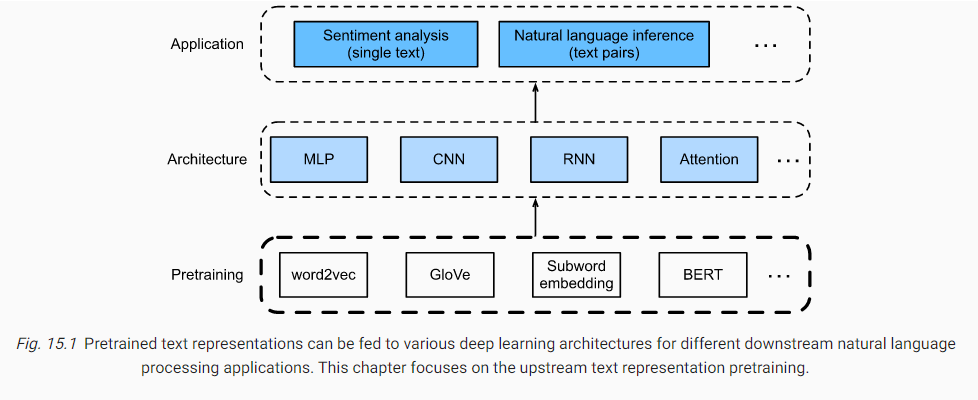


1.   Tokenize input text + other pre-processing steps if needed
2.   Convert tokens into input tensors if required by pretraining model (some pretraining models will require different inputs and special tokens such as [cls], [sep], attention masks for BERT, [pad] for padding tokens, etc.)
3.   Pretrain a model to get word embeddings 
4.   Convert word embeddings to PyTorch tensors
5.   Use tensors to train downstream models for your application







Simple tokenizer

In [ ]:
import os
import torch
from torch import nn

from torchtext.data.utils import get_tokenizer

tokenizer = get_tokenizer('basic_english')
text = "Hello, how are you?"

tokens = tokenizer(text)
print(tokens)

['hello', ',', 'how', 'are', 'you', '?']


Normalizing text data: the function below includes normalization, stemming, and tokenizing

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from torchtext.data.utils import get_tokenizer

# Function for text normalization
def normalize_text(text):
    # Convert to lowercase
    normalized_text = text.lower()

    # Remove punctuation
    normalized_text = re.sub(r'[^\w\s]', '', normalized_text)

    # Normalize specific words
    normalized_text = re.sub(r'\bamerica\b', 'usa', normalized_text)
    normalized_text = re.sub(r'\bus\b', 'usa', normalized_text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = normalized_text.split()
    words = [word for word in words if word not in stop_words]

    # Tokenize
    tokenizer = get_tokenizer('basic_english')
    tokens = tokenizer(normalized_text)

    # Perform stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in tokens]

    return stemmed_words

In [ ]:
sentences = ["Hello, how are you?","I want to go swimming in America",
             "I LOVE my dog and my cat.","my dawg loves me.","I am a student and I like to study!"]

normalized_tokens = [normalize_text(sentence) for sentence in sentences]
print(normalized_tokens)

[['hello', 'how', 'are', 'you'], ['i', 'want', 'to', 'go', 'swim', 'in', 'usa'], ['i', 'love', 'my', 'dog', 'and', 'my', 'cat'], ['my', 'dawg', 'love', 'me'], ['i', 'am', 'a', 'student', 'and', 'i', 'like', 'to', 'studi']]


Using Word2Vec

In [ ]:
import gensim
from gensim.models import Word2Vec

# Initialize and train the Word2Vec model
model = Word2Vec(normalized_tokens, vector_size=50, window=5, min_count=1, workers=1)

# Retrieve word embeddings
word_vector = model.wv['student']

# Find most similar words
similar_words = model.wv.most_similar('student')

print("Word Embedding for 'student':", word_vector)
print("Most similar words to 'student':", similar_words)


Word Embedding for 'student': [-1.06522227e-02 -2.55108834e-03 -1.47302225e-02  3.92113673e-03
  6.54639723e-03 -4.62770477e-05 -1.08967163e-02 -3.45217227e-03
  1.41698336e-02  7.47251743e-03 -1.77620985e-02 -6.82710158e-03
  4.70820442e-03  4.27603954e-03 -1.89280156e-02  9.14233178e-03
 -1.73139945e-02 -1.47741362e-02  6.96622394e-03 -6.94191689e-03
  7.12894183e-03  1.77881811e-02 -7.14864489e-03  1.86408497e-02
  3.42207681e-03  1.96955483e-02  1.14100864e-02 -1.82989668e-02
 -6.65546162e-03  1.30603500e-02  1.12055587e-02  1.74110308e-02
  1.38522051e-02  1.60777755e-02 -1.96460169e-02  8.59765057e-03
 -1.00601530e-02  7.02477200e-03  1.21133756e-02  8.78426339e-03
  1.50247188e-02  2.99543142e-03 -2.52988329e-03  1.15368012e-02
 -1.12791350e-02  7.71832492e-05  1.89131740e-02 -1.09625002e-02
  7.62855774e-03 -1.62260421e-02]
Most similar words to 'student': [('me', 0.20413899421691895), ('you', 0.11235636472702026), ('am', 0.07459607720375061), ('usa', 0.07415318489074707), ('ca

Visualizing Word Embeddings in 2-D space using t-SNE: t-SNE compresses higher dimension data into 2D, grouping similar vectors together and dissimilar vectors further apart

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def tsne_plot(model):
    labels = []
    tokens = []

    for word in model.wv.key_to_index:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.asarray(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

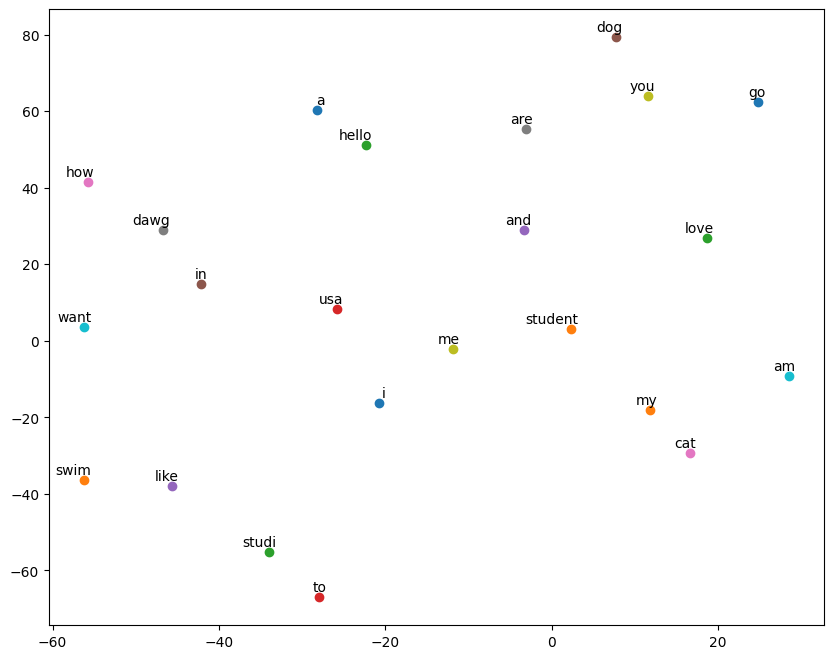

In [ ]:
tsne_plot(model)

Using GloVe

In [ ]:
from gensim.models import KeyedVectors

# Replace 'path_to_glove_file' with the path to the downloaded GloVe file from here: https://nlp.stanford.edu/projects/glove/
glove_file = 'path_to_glove_file'
word_vectors = KeyedVectors.load_word2vec_format(glove_file)

sentences = "Hello, how are you?"

# Tokenize the sentence into words (assuming whitespace tokenization)
tokenizer = get_tokenizer('basic_english')

words = [tokenizer(sentence) for sentence in sentences]
print(words)

# Get the word embeddings for each word
embeddings = [word_vectors[word] for word in words if word in word_vectors.vocab]

print(embeddings)